In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import pandas as pd
import random
import numpy
import splat



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
df_singles = pd.read_hdf(r'C:/Users/juand/Research/spectral_templates_data_version_june20.h5', key='singles')
df_singles

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,object_name
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.215337,0.215931,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,2MASS J16002535-2644060
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.206600,0.201257,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,2MASS J17252029-0024508
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.229087,0.207245,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,2MASS J01532750+3631482
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,WISE J141143.25-452418.3
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.241278,0.246377,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,2MASS J19445221-0831036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-0.004027,-0.007743,-0.004455,0.005451,0.001937,-0.002612,0.002762,0.003820,0.011900,0.006834,...,0.001825,0.003611,0.000533,0.003529,0.002783,0.006177,0.002361,0.000314,38.0,WISE J025409.51+022358.6
432,0.008489,0.009103,-0.001436,0.010861,0.008182,0.012516,0.011853,0.010578,0.003773,0.018182,...,-0.001485,-0.002331,-0.003116,0.000461,0.004334,0.003893,0.004213,0.000512,38.0,2MASSI J0415195-093506
433,-0.004778,0.078588,0.011728,-0.005535,0.033752,0.007601,-0.034531,-0.006146,-0.020120,0.007291,...,0.002653,0.000853,0.002269,-0.005126,0.019522,-0.002011,-0.015760,0.007481,37.0,WISE J132233.64-234016.8
434,0.073008,0.009225,-0.005804,-0.039170,-0.014236,-0.015112,0.038132,-0.001542,-0.009924,0.014488,...,0.011270,0.002495,-0.008254,-0.004863,0.001008,0.001313,0.001250,0.006463,38.0,WISE J222623.05+044004.0


In [3]:
del df_singles["object_name"]

In [4]:
df_singlesCut = df_singles.copy()

In [5]:
df_singlesCut = df_singlesCut.loc[df_singlesCut['spectral_type'] < 28]
df_singlesCut = df_singlesCut.loc[df_singlesCut['spectral_type'] > 16]
df_singlesCut = df_singlesCut.reset_index()
del df_singlesCut["index"]
df_singlesCut

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_432,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.156008,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.218438,0.223195,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.198191,0.192871,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.253640,0.251165,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.181237,0.177882,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.091815,0.040935,0.080627,0.094314,0.098135,0.097049,0.162924,0.124603,0.119426,0.174763,...,0.307897,0.303245,0.314644,0.298030,0.298126,0.305611,0.295877,0.292493,0.313691,25.0
224,0.015546,0.005483,0.025650,0.125470,0.141686,0.098963,0.041578,0.115340,0.092610,0.122965,...,0.249199,0.246703,0.237024,0.245865,0.234510,0.245132,0.239613,0.236218,0.274649,26.0
225,0.100953,0.175887,0.147420,0.156246,0.168440,0.173606,0.187552,0.205193,0.249264,0.211953,...,0.244171,0.246410,0.248193,0.227962,0.236145,0.232735,0.239658,0.238972,0.241570,26.0
226,0.064635,0.067172,0.069968,0.082823,0.101335,0.110372,0.102538,0.107109,0.129952,0.138813,...,0.212281,0.212058,0.210687,0.207319,0.208570,0.210931,0.211042,0.209572,0.208942,27.0


In [6]:
interpol_flux=[]
for j in range(len(df_singlesCut)):
    a=[]
    for i in range(441):
        a.append(df_singlesCut["flux_" + str(i)][j])
    interpol_flux.append(a)
df_singlesCut["interpol_flux"]=interpol_flux

In [7]:
df_singlesCut

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.223195,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192871,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.251165,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.177882,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.091815,0.040935,0.080627,0.094314,0.098135,0.097049,0.162924,0.124603,0.119426,0.174763,...,0.303245,0.314644,0.298030,0.298126,0.305611,0.295877,0.292493,0.313691,25.0,"[0.09181530835507652, 0.04093481195454178, 0.0..."
224,0.015546,0.005483,0.025650,0.125470,0.141686,0.098963,0.041578,0.115340,0.092610,0.122965,...,0.246703,0.237024,0.245865,0.234510,0.245132,0.239613,0.236218,0.274649,26.0,"[0.015546135336049005, 0.005482591449850909, 0..."
225,0.100953,0.175887,0.147420,0.156246,0.168440,0.173606,0.187552,0.205193,0.249264,0.211953,...,0.246410,0.248193,0.227962,0.236145,0.232735,0.239658,0.238972,0.241570,26.0,"[0.10095255337089246, 0.1758866808270969, 0.14..."
226,0.064635,0.067172,0.069968,0.082823,0.101335,0.110372,0.102538,0.107109,0.129952,0.138813,...,0.212058,0.210687,0.207319,0.208570,0.210931,0.211042,0.209572,0.208942,27.0,"[0.06463534571294974, 0.06717209842600344, 0.0..."


In [8]:
noise_fluxes = []
noise_type = []
for j in range(19):
    for i in range(len(df_singlesCut)):
        flux = df_singlesCut["interpol_flux"][i]
        noise_fluxes.append(flux+numpy.random.normal(0,0.05*numpy.nanmax(flux),len(flux)))
        noise_type.append(df_singlesCut["spectral_type"][i])

In [9]:
df_singles_noise = pd.DataFrame({"spectral_type": noise_type})
df_singles_noise["interpol_flux"] = noise_fluxes

In [10]:
df_singles_noise

,spectral_type,interpol_flux
0,17.0,"[0.5663366001912714, 0.5136929619970694, 0.681..."
1,17.0,"[0.30863670677595784, 0.4286157411498167, 0.40..."
2,17.0,"[0.5607792803920555, 0.5599811482250406, 0.629..."
3,17.0,"[0.5540891329359972, 0.6278286594012007, 0.599..."
4,17.0,"[0.24540953040985267, 0.4542715263021589, 0.52..."
...,...,...
4327,25.0,"[0.07790002696831472, 0.05876493385420629, 0.0..."
4328,26.0,"[-0.09208949732679868, -0.02448170273959036, -..."
4329,26.0,"[0.12058228042781044, 0.18684227770204415, 0.1..."
4330,27.0,"[0.06778840498637556, 0.005645421679553918, 0...."


In [11]:
for i in range(len(df_singles_noise["interpol_flux"][0])):
    flux_i =[]
    for j in range(len(df_singles_noise["interpol_flux"])):
        flux_i.append(df_singles_noise["interpol_flux"][j][i])
    df_singles_noise["flux"+"_"+str(i)]=flux_i

In [12]:
df_singles_noise

,spectral_type,interpol_flux,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,...,flux_431,flux_432,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440
0,17.0,"[0.5663366001912714, 0.5136929619970694, 0.681...",0.566337,0.513693,0.681367,0.643162,0.601330,0.649821,0.586616,0.684483,...,0.172141,0.154803,0.109710,0.086020,0.169413,0.156904,0.077438,0.144217,0.180199,0.127696
1,17.0,"[0.30863670677595784, 0.4286157411498167, 0.40...",0.308637,0.428616,0.400258,0.508964,0.495358,0.536572,0.552249,0.602987,...,0.207683,0.264665,0.219659,0.235194,0.201794,0.264838,0.237879,0.158134,0.237229,0.224767
2,17.0,"[0.5607792803920555, 0.5599811482250406, 0.629...",0.560779,0.559981,0.629803,0.626605,0.721004,0.700416,0.702317,0.779405,...,0.341349,0.243587,0.154181,0.236352,0.202762,0.208511,0.219835,0.127380,0.221453,0.085036
3,17.0,"[0.5540891329359972, 0.6278286594012007, 0.599...",0.554089,0.627829,0.599689,0.683686,0.684134,0.653028,0.556535,0.650009,...,0.275028,0.358636,0.190935,0.242641,0.235636,0.228202,0.276283,0.203977,0.268792,0.224407
4,17.0,"[0.24540953040985267, 0.4542715263021589, 0.52...",0.245410,0.454272,0.520867,0.507607,0.538535,0.537171,0.630895,0.550009,...,0.156724,0.115244,0.178790,0.206628,0.187830,0.180689,0.141530,0.139657,0.128665,0.183698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,25.0,"[0.07790002696831472, 0.05876493385420629, 0.0...",0.077900,0.058765,0.099270,0.105407,0.062422,0.134736,0.166247,0.152285,...,0.374096,0.243711,0.269876,0.289384,0.241320,0.278903,0.366028,0.326157,0.246673,0.263453
4328,26.0,"[-0.09208949732679868, -0.02448170273959036, -...",-0.092089,-0.024482,-0.017627,0.158751,0.085335,0.084237,0.060587,0.112262,...,0.261256,0.288960,0.274196,0.190654,0.310119,0.327260,0.174286,0.216974,0.204050,0.249270
4329,26.0,"[0.12058228042781044, 0.18684227770204415, 0.1...",0.120582,0.186842,0.166032,0.150473,0.125339,0.157556,0.152831,0.260491,...,0.139755,0.224907,0.271737,0.288300,0.181103,0.124188,0.160840,0.265202,0.266333,0.155048
4330,27.0,"[0.06778840498637556, 0.005645421679553918, 0....",0.067788,0.005645,0.029876,0.083742,0.113735,0.071634,0.147461,0.107959,...,0.228490,0.209371,0.261455,0.262324,0.227991,0.157686,0.229596,0.141837,0.213958,0.194489


In [13]:
frames = [df_singlesCut, df_singles_noise]

df_singlesCutNoise = pd.concat(frames)
df_singlesCutNoise = df_singlesCutNoise.reset_index()
del df_singlesCutNoise["index"]
df_singlesCutNoise

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.223195,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192871,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.251165,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.177882,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.077900,0.058765,0.099270,0.105407,0.062422,0.134736,0.166247,0.152285,0.163943,0.171426,...,0.269876,0.289384,0.241320,0.278903,0.366028,0.326157,0.246673,0.263453,25.0,"[0.07790002696831472, 0.05876493385420629, 0.0..."
4556,-0.092089,-0.024482,-0.017627,0.158751,0.085335,0.084237,0.060587,0.112262,0.064410,0.154827,...,0.274196,0.190654,0.310119,0.327260,0.174286,0.216974,0.204050,0.249270,26.0,"[-0.09208949732679868, -0.02448170273959036, -..."
4557,0.120582,0.186842,0.166032,0.150473,0.125339,0.157556,0.152831,0.260491,0.235409,0.289684,...,0.271737,0.288300,0.181103,0.124188,0.160840,0.265202,0.266333,0.155048,26.0,"[0.12058228042781044, 0.18684227770204415, 0.1..."
4558,0.067788,0.005645,0.029876,0.083742,0.113735,0.071634,0.147461,0.107959,0.067773,0.011578,...,0.261455,0.262324,0.227991,0.157686,0.229596,0.141837,0.213958,0.194489,27.0,"[0.06778840498637556, 0.005645421679553918, 0...."


In [14]:
interpol_flux=[]
for j in range(len(df_singles)):
    a=[]
    for i in range(441):
        a.append(df_singles["flux_" + str(i)][j])
    interpol_flux.append(a)
df_singles["interpol_flux"]=interpol_flux

In [15]:
noise_fluxes = []
noise_type = []
for j in range(9):
    for i in range(len(df_singles)):
        flux = df_singles["interpol_flux"][i]
        noise_fluxes.append(flux+numpy.random.normal(0,0.05*numpy.nanmax(flux),len(flux)))
        noise_type.append(df_singles["spectral_type"][i])

In [16]:
df_singlesAll_noise = pd.DataFrame({"spectral_type": noise_type})
df_singlesAll_noise["interpol_flux"] = noise_fluxes

In [17]:
for i in range(len(df_singlesAll_noise["interpol_flux"][0])):
    flux_i =[]
    for j in range(len(df_singlesAll_noise["interpol_flux"])):
        flux_i.append(df_singlesAll_noise["interpol_flux"][j][i])
    df_singlesAll_noise["flux"+"_"+str(i)]=flux_i

In [18]:
df_singlesAll_noise

,spectral_type,interpol_flux,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,...,flux_431,flux_432,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440
0,16.0,"[0.42442226366229785, 0.6025302211789096, 0.75...",0.424422,0.602530,0.758648,0.757828,0.680391,0.607109,0.722671,0.653226,...,0.238120,0.177264,0.206976,0.275549,0.132355,0.225471,0.140438,0.255861,0.174756,0.227602
1,12.0,"[0.6964262297585803, 0.6719305266671994, 0.770...",0.696426,0.671931,0.770708,0.848155,0.663504,0.684713,0.736111,0.578630,...,0.213071,0.222370,0.244659,0.146531,0.156149,0.193573,0.214137,0.164997,0.287089,0.260082
2,15.0,"[0.3988518222302181, 0.5373719914181193, 0.537...",0.398852,0.537372,0.537823,0.661492,0.553173,0.655034,0.614565,0.637668,...,0.167350,0.182315,0.214998,0.284280,0.163776,0.152697,0.249937,0.244254,0.173482,0.138915
3,17.0,"[0.5401662410271033, 0.6878591141493304, 0.699...",0.540166,0.687859,0.699067,0.569022,0.624728,0.694188,0.708658,0.701512,...,0.142590,0.145299,0.196449,0.160349,0.152748,0.138072,0.128079,0.139804,0.139026,0.168628
4,13.0,"[0.4789512724935253, 0.4632325212346766, 0.705...",0.478951,0.463233,0.705991,0.528108,0.721882,0.662469,0.643466,0.658939,...,0.278406,0.194540,0.219366,0.223428,0.222713,0.242874,0.239307,0.168884,0.228514,0.146598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,38.0,"[0.007444478736763217, 0.08892874155828256, 0....",0.007444,0.088929,0.010797,0.029140,0.022948,0.007786,-0.005411,0.025440,...,-0.011736,0.022667,0.008230,0.020531,-0.060800,0.024905,0.012437,-0.006228,-0.015371,-0.023969
3920,38.0,"[0.06491910509256185, 0.09040904341286478, -0....",0.064919,0.090409,-0.043141,0.086102,-0.021776,0.082781,-0.047865,0.018969,...,-0.076990,-0.013810,-0.035150,-0.053176,-0.064323,-0.028553,0.010425,0.008913,0.041634,0.116431
3921,37.0,"[0.01648478375939225, 0.060306732476641964, -0...",0.016485,0.060307,-0.036816,-0.005805,0.052647,0.047025,-0.030721,-0.020447,...,-0.015798,0.022388,-0.003014,-0.000258,-0.005099,-0.003464,-0.003793,0.027272,0.014379,0.039887
3922,38.0,"[0.09946263942634546, -0.009679538189830392, 0...",0.099463,-0.009680,0.079899,-0.062273,-0.016334,-0.036745,0.032023,0.060511,...,0.058450,-0.018568,0.111852,0.058615,0.006952,-0.095382,-0.070162,-0.034646,-0.079925,0.040874


In [19]:
frames = [df_singles, df_singlesAll_noise]

df_singlesNoise = pd.concat(frames)
df_singlesNoise = df_singlesNoise.reset_index()
del df_singlesNoise["index"]
df_singlesNoise

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.215337,0.215931,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,"[0.4945521009198528, 0.5660506093339908, 0.614..."
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.206600,0.201257,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,"[0.6345121852958099, 0.657555962706047, 0.7148..."
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.229087,0.207245,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,"[0.4938933093401029, 0.5500692660287466, 0.571..."
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.241278,0.246377,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,"[0.46281527653083354, 0.5359644897431577, 0.58..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,0.007444,0.088929,0.010797,0.029140,0.022948,0.007786,-0.005411,0.025440,0.000826,0.006416,...,0.008230,0.020531,-0.060800,0.024905,0.012437,-0.006228,-0.015371,-0.023969,38.0,"[0.007444478736763217, 0.08892874155828256, 0...."
4356,0.064919,0.090409,-0.043141,0.086102,-0.021776,0.082781,-0.047865,0.018969,-0.076834,0.034557,...,-0.035150,-0.053176,-0.064323,-0.028553,0.010425,0.008913,0.041634,0.116431,38.0,"[0.06491910509256185, 0.09040904341286478, -0...."
4357,0.016485,0.060307,-0.036816,-0.005805,0.052647,0.047025,-0.030721,-0.020447,-0.021097,-0.018620,...,-0.003014,-0.000258,-0.005099,-0.003464,-0.003793,0.027272,0.014379,0.039887,37.0,"[0.01648478375939225, 0.060306732476641964, -0..."
4358,0.099463,-0.009680,0.079899,-0.062273,-0.016334,-0.036745,0.032023,0.060511,-0.116607,-0.016724,...,0.111852,0.058615,0.006952,-0.095382,-0.070162,-0.034646,-0.079925,0.040874,38.0,"[0.09946263942634546, -0.009679538189830392, 0..."


In [20]:
df_binaries = pd.read_hdf(r'C:/Users/juand/Research/spectral_templates_data_version_june20.h5', key='binaries')
df_binaries

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [21]:
df_binaries["spectral_type"]=df_binaries["system_type"]
del df_binaries["system_type"]
df_binaries

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,spectral_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [22]:
df_binaries1 = df_binaries.copy()

In [23]:
df_binaries1 = df_binaries1.loc[df_binaries1['primary_type'] < 28]
df_binaries1 = df_binaries1.loc[df_binaries1['primary_type'] > 16]
df_binaries1 = df_binaries1.loc[df_binaries1['secondary_type'] > 30]
df_binaries1 = df_binaries1.loc[df_binaries1['secondary_type'] < 39]
df_binaries1 = df_binaries1.reset_index()
del df_binaries1["index"]
df_binaries1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,spectral_type
0,0.493893,0.550069,0.571380,0.647315,0.666166,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.207245,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,17.0,31.0,16.0
1,0.351351,0.404010,0.458808,0.494069,0.524599,0.571850,0.578583,0.584094,0.579003,0.572694,...,0.212473,0.223440,0.220150,0.209722,0.208115,0.201419,0.207814,17.0,31.0,16.0
2,0.342881,0.395269,0.451184,0.488437,0.518428,0.564841,0.570936,0.576439,0.570763,0.563745,...,0.217328,0.228195,0.224661,0.214164,0.213078,0.206306,0.212578,17.0,31.0,17.0
3,0.348187,0.401325,0.456690,0.492681,0.524107,0.572395,0.579060,0.583834,0.577111,0.569891,...,0.215804,0.227011,0.223767,0.212970,0.211417,0.204462,0.210968,17.0,31.0,17.0
4,0.350210,0.401207,0.457209,0.486718,0.516109,0.568047,0.574545,0.577777,0.569560,0.566788,...,0.216013,0.227315,0.224216,0.213625,0.211873,0.204926,0.211351,17.0,32.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.012125,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,20.0,38.0,36.0
7385,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.012034,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,20.0,38.0,36.0
7386,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,-0.000403,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,20.0,38.0,37.0
7387,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,-0.009601,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,20.0,38.0,36.0


In [24]:
interpol_flux=[]
for j in range(len(df_binaries1)):
    a=[]
    for i in range(441):
        a.append(df_binaries1["flux_" + str(i)][j])
    interpol_flux.append(a)
df_binaries1["interpol_flux"]=interpol_flux

In [25]:
df_binaries1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,spectral_type,interpol_flux
0,0.493893,0.550069,0.571380,0.647315,0.666166,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,17.0,31.0,16.0,"[0.4938933374928867, 0.5500693256333914, 0.571..."
1,0.351351,0.404010,0.458808,0.494069,0.524599,0.571850,0.578583,0.584094,0.579003,0.572694,...,0.223440,0.220150,0.209722,0.208115,0.201419,0.207814,17.0,31.0,16.0,"[0.35135114533840917, 0.40401023636820693, 0.4..."
2,0.342881,0.395269,0.451184,0.488437,0.518428,0.564841,0.570936,0.576439,0.570763,0.563745,...,0.228195,0.224661,0.214164,0.213078,0.206306,0.212578,17.0,31.0,17.0,"[0.3428812308474753, 0.39526902292461824, 0.45..."
3,0.348187,0.401325,0.456690,0.492681,0.524107,0.572395,0.579060,0.583834,0.577111,0.569891,...,0.227011,0.223767,0.212970,0.211417,0.204462,0.210968,17.0,31.0,17.0,"[0.3481866853397901, 0.40132453100500104, 0.45..."
4,0.350210,0.401207,0.457209,0.486718,0.516109,0.568047,0.574545,0.577777,0.569560,0.566788,...,0.227315,0.224216,0.213625,0.211873,0.204926,0.211351,17.0,32.0,17.0,"[0.3502095488988858, 0.40120732967433803, 0.45..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,20.0,38.0,36.0,"[0.006509890312396639, 0.023606524488617657, 0..."
7385,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,20.0,38.0,36.0,"[0.0066440095388254, 0.02384644643456362, 0.02..."
7386,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,20.0,38.0,37.0,"[0.004678941897092824, 0.0053383172777176895, ..."
7387,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,20.0,38.0,36.0,"[0.05117170015118864, -0.015936106783344534, -..."


In [26]:
df_binaries1sample = df_binaries1.sample(frac=0.2, replace=False, random_state=1)
df_binaries1sample = df_binaries1sample.reset_index()
del df_binaries1sample["index"]
df_binaries1sample

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,spectral_type,interpol_flux
0,6.555245e-02,4.890692e-02,2.520553e-02,3.311281e-02,-2.850782e-02,4.494851e-03,8.190056e-02,3.954523e-02,5.066244e-02,2.026832e-02,...,2.863920e-01,2.832307e-01,2.664139e-01,2.843948e-01,2.790293e-01,2.777627e-01,27.0,36.0,29.0,"[0.06555244986299906, 0.04890692142348671, 0.0..."
1,1.025525e-03,2.169515e-03,2.081647e-03,6.065581e-04,5.735182e-04,-9.040628e-05,7.137278e-04,7.236675e-05,2.135422e-04,3.505781e-04,...,-3.155630e-04,3.940586e-04,1.381141e-04,-1.711203e-04,-9.016090e-05,4.170645e-04,20.0,37.0,34.0,"[0.001025525357383154, 0.0021695154567784886, ..."
2,1.522283e-01,1.917140e-01,2.246140e-01,2.734351e-01,3.031819e-01,3.212685e-01,3.179276e-01,3.218121e-01,3.406440e-01,3.429325e-01,...,2.417097e-01,2.393630e-01,2.338935e-01,2.388058e-01,2.341784e-01,2.375452e-01,25.0,38.0,19.0,"[0.15222831855825328, 0.19171402496921885, 0.2..."
3,3.481867e-01,4.013245e-01,4.566902e-01,4.926806e-01,5.241071e-01,5.723954e-01,5.790601e-01,5.838339e-01,5.771106e-01,5.698911e-01,...,2.270108e-01,2.237668e-01,2.129703e-01,2.114171e-01,2.044625e-01,2.109679e-01,17.0,38.0,17.0,"[0.3481866853408335, 0.4013245310062236, 0.456..."
4,-1.000444e-11,-8.780361e-12,-7.547969e-12,-6.306827e-12,-5.056936e-12,-3.798733e-12,-2.532217e-12,-1.256952e-12,2.706307e-14,1.319828e-12,...,1.576312e-12,1.364623e-12,1.235989e-12,1.445288e-12,1.397059e-12,1.414450e-12,20.0,33.0,32.0,"[-1.0004440446498776e-11, -8.780360776373068e-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,3.409230e-01,3.804457e-01,4.258100e-01,4.684581e-01,5.184064e-01,5.395054e-01,5.349901e-01,5.368239e-01,5.387570e-01,5.436946e-01,...,2.315693e-01,2.256350e-01,2.234635e-01,2.264131e-01,2.277333e-01,2.229160e-01,18.0,32.0,18.0,"[0.3409230133186621, 0.38044571596498167, 0.42..."
1474,2.413041e-01,1.548437e-01,1.121905e-01,2.008466e-01,2.193055e-01,2.255251e-01,3.039005e-01,2.738276e-01,1.993184e-01,2.462057e-01,...,3.052620e-01,2.965851e-01,3.089239e-01,3.215601e-01,3.135334e-01,2.969504e-01,21.0,32.0,21.0,"[0.24130407169236756, 0.15484371299924754, 0.1..."
1475,4.496269e-14,6.432348e-14,1.221507e-13,1.278082e-13,4.125887e-15,-1.835884e-14,7.185808e-15,1.691884e-14,6.318816e-14,5.196463e-14,...,-9.283043e-16,6.407320e-15,1.560340e-14,1.005349e-14,1.399741e-14,8.424792e-15,20.0,38.0,34.0,"[4.496268644019879e-14, 6.432348451690732e-14,..."
1476,2.822050e-01,3.422440e-01,3.957407e-01,4.184995e-01,4.533676e-01,4.819309e-01,4.760680e-01,4.757153e-01,4.704896e-01,4.728209e-01,...,2.167300e-01,2.174085e-01,2.130872e-01,2.074110e-01,2.098692e-01,2.150378e-01,18.0,35.0,18.0,"[0.2822050040232709, 0.3422440277089845, 0.395..."


In [27]:
noise_fluxes = []
noise_type = []
for j in range(9):
    for i in range(len(df_binaries1sample)):
        flux = df_binaries1sample["interpol_flux"][i]
        noise_fluxes.append(flux+numpy.random.normal(0,0.05*numpy.nanmax(flux),len(flux)))
        noise_type.append(df_binaries1sample["spectral_type"][i])

In [28]:
df_binaries1sample_noise = pd.DataFrame({"spectral_type": noise_type})
df_binaries1sample_noise["interpol_flux"] = noise_fluxes

In [29]:
for i in range(len(df_binaries1sample_noise["interpol_flux"][0])):
    flux_i =[]
    for j in range(len(df_binaries1sample_noise["interpol_flux"])):
        flux_i.append(df_binaries1sample_noise["interpol_flux"][j][i])
    df_binaries1sample_noise["flux"+"_"+str(i)]=flux_i

In [30]:
df_binaries1sample_noise

,spectral_type,interpol_flux,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,...,flux_431,flux_432,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440
0,29.0,"[-0.012610913753329733, -0.008522844389777406,...",-0.012611,-0.008523,0.045109,0.038759,-0.077857,0.087953,0.135949,0.053177,...,0.271558,0.269610,0.281245,0.253419,0.287658,0.320235,0.211816,0.265311,0.327141,0.282953
1,34.0,"[0.05055460503664166, 0.03461730453341638, -0....",0.050555,0.034617,-0.020127,0.108989,-0.013375,0.017920,0.021322,0.010736,...,0.067082,-0.014459,0.059631,-0.011977,-0.108308,0.003099,0.059762,-0.061539,-0.025428,0.048860
2,19.0,"[0.1512534224380809, 0.14604443107663784, 0.20...",0.151253,0.146044,0.208580,0.169715,0.280719,0.234357,0.311779,0.332697,...,0.201741,0.292939,0.193127,0.130249,0.271451,0.219437,0.210134,0.255911,0.270060,0.267476
3,17.0,"[0.35674105601298456, 0.4711830596210975, 0.47...",0.356741,0.471183,0.474510,0.588060,0.482707,0.539766,0.560609,0.543588,...,0.199462,0.314266,0.207397,0.213105,0.209736,0.212106,0.176842,0.270722,0.188301,0.205220
4,32.0,"[0.003005989886079439, -0.03579544041460792, -...",0.003006,-0.035795,-0.032827,0.019901,-0.040282,0.004930,0.050634,-0.086414,...,0.026178,0.007610,-0.063085,0.034293,0.038155,0.024208,0.043432,-0.106168,0.046606,-0.014163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,18.0,"[0.31639348226386343, 0.35470910849347753, 0.4...",0.316393,0.354709,0.446660,0.421581,0.494639,0.611033,0.528038,0.473740,...,0.298643,0.315923,0.267622,0.238015,0.190253,0.267772,0.256685,0.197789,0.250579,0.100124
13298,21.0,"[0.19386137986003163, 0.11035326705945522, 0.0...",0.193861,0.110353,0.078812,0.202186,0.212531,0.251318,0.264549,0.238610,...,0.373543,0.233125,0.419477,0.381781,0.281791,0.266535,0.267490,0.347324,0.298315,0.255558
13299,34.0,"[0.04456753863398755, -0.010941635506381798, 0...",0.044568,-0.010942,0.036295,-0.011747,0.050841,-0.037312,-0.010094,-0.065612,...,-0.004860,0.047401,-0.079069,-0.006942,0.034481,-0.015507,-0.098252,-0.057849,0.015654,-0.081551
13300,18.0,"[0.30184625582600644, 0.3353141899722279, 0.35...",0.301846,0.335314,0.356728,0.414669,0.503325,0.451848,0.409264,0.498513,...,0.224281,0.207770,0.247563,0.233431,0.276176,0.179632,0.253551,0.219541,0.150857,0.237932


In [31]:
frames = [df_binaries1sample, df_binaries1sample_noise]

df_binaries1Noise = pd.concat(frames)
df_binaries1Noise = df_binaries1Noise.reset_index()
del df_binaries1Noise["index"]
df_binaries1Noise

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,spectral_type,interpol_flux
0,6.555245e-02,4.890692e-02,2.520553e-02,3.311281e-02,-2.850782e-02,4.494851e-03,8.190056e-02,3.954523e-02,5.066244e-02,2.026832e-02,...,2.863920e-01,2.832307e-01,2.664139e-01,2.843948e-01,2.790293e-01,2.777627e-01,27.0,36.0,29.0,"[0.06555244986299906, 0.04890692142348671, 0.0..."
1,1.025525e-03,2.169515e-03,2.081647e-03,6.065581e-04,5.735182e-04,-9.040628e-05,7.137278e-04,7.236675e-05,2.135422e-04,3.505781e-04,...,-3.155630e-04,3.940586e-04,1.381141e-04,-1.711203e-04,-9.016090e-05,4.170645e-04,20.0,37.0,34.0,"[0.001025525357383154, 0.0021695154567784886, ..."
2,1.522283e-01,1.917140e-01,2.246140e-01,2.734351e-01,3.031819e-01,3.212685e-01,3.179276e-01,3.218121e-01,3.406440e-01,3.429325e-01,...,2.417097e-01,2.393630e-01,2.338935e-01,2.388058e-01,2.341784e-01,2.375452e-01,25.0,38.0,19.0,"[0.15222831855825328, 0.19171402496921885, 0.2..."
3,3.481867e-01,4.013245e-01,4.566902e-01,4.926806e-01,5.241071e-01,5.723954e-01,5.790601e-01,5.838339e-01,5.771106e-01,5.698911e-01,...,2.270108e-01,2.237668e-01,2.129703e-01,2.114171e-01,2.044625e-01,2.109679e-01,17.0,38.0,17.0,"[0.3481866853408335, 0.4013245310062236, 0.456..."
4,-1.000444e-11,-8.780361e-12,-7.547969e-12,-6.306827e-12,-5.056936e-12,-3.798733e-12,-2.532217e-12,-1.256952e-12,2.706307e-14,1.319828e-12,...,1.576312e-12,1.364623e-12,1.235989e-12,1.445288e-12,1.397059e-12,1.414450e-12,20.0,33.0,32.0,"[-1.0004440446498776e-11, -8.780360776373068e-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,3.163935e-01,3.547091e-01,4.466602e-01,4.215812e-01,4.946389e-01,6.110332e-01,5.280385e-01,4.737403e-01,5.454669e-01,5.402125e-01,...,1.902535e-01,2.677724e-01,2.566849e-01,1.977886e-01,2.505787e-01,1.001236e-01,NaN,NaN,18.0,"[0.31639348226386343, 0.35470910849347753, 0.4..."
14776,1.938614e-01,1.103533e-01,7.881167e-02,2.021861e-01,2.125313e-01,2.513184e-01,2.645487e-01,2.386096e-01,1.879626e-01,2.636694e-01,...,2.817909e-01,2.665354e-01,2.674896e-01,3.473236e-01,2.983153e-01,2.555578e-01,NaN,NaN,21.0,"[0.19386137986003163, 0.11035326705945522, 0.0..."
14777,4.456754e-02,-1.094164e-02,3.629496e-02,-1.174706e-02,5.084138e-02,-3.731194e-02,-1.009359e-02,-6.561163e-02,2.749335e-02,-6.981190e-02,...,3.448069e-02,-1.550678e-02,-9.825248e-02,-5.784879e-02,1.565352e-02,-8.155065e-02,NaN,NaN,34.0,"[0.04456753863398755, -0.010941635506381798, 0..."
14778,3.018463e-01,3.353142e-01,3.567280e-01,4.146692e-01,5.033254e-01,4.518483e-01,4.092643e-01,4.985126e-01,5.093583e-01,4.524872e-01,...,2.761756e-01,1.796324e-01,2.535509e-01,2.195408e-01,1.508572e-01,2.379316e-01,NaN,NaN,18.0,"[0.30184625582600644, 0.3353141899722279, 0.35..."


In [32]:
del df_binaries1["primary_type"]
del df_binaries1["secondary_type"]

In [33]:
del df_binaries1Noise["primary_type"]
del df_binaries1Noise["secondary_type"]

In [34]:
frames = [df_singlesCut, df_binaries1]

df_Cut1 = pd.concat(frames)
df_Cut1 = df_Cut1.reset_index()
del df_Cut1["index"]
df_Cut1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.223195,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192871,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.251165,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.177882,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.016433,0.012125,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,36.0,"[0.006509890312396639, 0.023606524488617657, 0..."
7613,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.016354,0.012034,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,36.0,"[0.0066440095388254, 0.02384644643456362, 0.02..."
7614,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,-0.000391,-0.000403,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,37.0,"[0.004678941897092824, 0.0053383172777176895, ..."
7615,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,0.017038,-0.009601,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,36.0,"[0.05117170015118864, -0.015936106783344534, -..."


In [87]:
model = list()
for i in range(len(df_Cut1)):
   if model.count(0) < (len(df_Cut1)/2):
       model.append(random.randint(0,1))
   else:
       model.append(1)
df_Cut1['num_class']=model

In [35]:
frames = [df_singlesCutNoise, df_binaries1Noise]

df_CutNoise1 = pd.concat(frames)
df_CutNoise1 = df_CutNoise1.reset_index()
del df_CutNoise1["index"]
df_CutNoise1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.223195,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192871,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.251165,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.177882,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19335,0.316393,0.354709,0.446660,0.421581,0.494639,0.611033,0.528038,0.473740,0.545467,0.540213,...,0.267622,0.238015,0.190253,0.267772,0.256685,0.197789,0.250579,0.100124,18.0,"[0.31639348226386343, 0.35470910849347753, 0.4..."
19336,0.193861,0.110353,0.078812,0.202186,0.212531,0.251318,0.264549,0.238610,0.187963,0.263669,...,0.419477,0.381781,0.281791,0.266535,0.267490,0.347324,0.298315,0.255558,21.0,"[0.19386137986003163, 0.11035326705945522, 0.0..."
19337,0.044568,-0.010942,0.036295,-0.011747,0.050841,-0.037312,-0.010094,-0.065612,0.027493,-0.069812,...,-0.079069,-0.006942,0.034481,-0.015507,-0.098252,-0.057849,0.015654,-0.081551,34.0,"[0.04456753863398755, -0.010941635506381798, 0..."
19338,0.301846,0.335314,0.356728,0.414669,0.503325,0.451848,0.409264,0.498513,0.509358,0.452487,...,0.247563,0.233431,0.276176,0.179632,0.253551,0.219541,0.150857,0.237932,18.0,"[0.30184625582600644, 0.3353141899722279, 0.35..."


In [90]:
model = list()
for i in range(len(df_CutNoise1)):
   if model.count(0) < (len(df_CutNoise1)/2):
       model.append(random.randint(0,1))
   else:
       model.append(1)
df_CutNoise1['num_class']=model

In [36]:
frames = [df_singles, df_binaries1]

df_all1 = pd.concat(frames)
df_all1 = df_all1.reset_index()
del df_all1["index"]
df_all1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.215337,0.215931,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,"[0.4945521009198528, 0.5660506093339908, 0.614..."
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.206600,0.201257,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,"[0.6345121852958099, 0.657555962706047, 0.7148..."
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.229087,0.207245,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,"[0.4938933093401029, 0.5500692660287466, 0.571..."
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.241278,0.246377,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,"[0.46281527653083354, 0.5359644897431577, 0.58..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.016433,0.012125,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,36.0,"[0.006509890312396639, 0.023606524488617657, 0..."
7821,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.016354,0.012034,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,36.0,"[0.0066440095388254, 0.02384644643456362, 0.02..."
7822,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,-0.000391,-0.000403,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,37.0,"[0.004678941897092824, 0.0053383172777176895, ..."
7823,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,0.017038,-0.009601,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,36.0,"[0.05117170015118864, -0.015936106783344534, -..."


In [91]:
model = list()
for i in range(len(df_all1)):
   if model.count(0) < (len(df_all1)/2):
       model.append(random.randint(0,1))
   else:
       model.append(1)
df_all1['num_class']=model

In [37]:
frames = [df_singles, df_binaries]

df_all = pd.concat(frames)
df_all = df_all.reset_index()
del df_all["index"]
df_all

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux,primary_type,secondary_type
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,"[0.4945521009198528, 0.5660506093339908, 0.614...",NaN,NaN
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,"[0.6345121852958099, 0.657555962706047, 0.7148...",NaN,NaN
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,"[0.4938933093401029, 0.5500692660287466, 0.571...",NaN,NaN
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620...",NaN,NaN
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,"[0.46281527653083354, 0.5359644897431577, 0.58...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,NaN,38.0,38.0
42440,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,NaN,38.0,39.0
42441,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,NaN,38.0,38.0
42442,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,39.0,NaN,38.0,39.0


In [92]:
model = list()
for i in range(len(df_all)):
   if model.count(0) < (len(df_all)/2):
       model.append(random.randint(0,1))
   else:
       model.append(1)
df_all['num_class']=model

In [38]:
df_binariesSample = df_binaries.sample(frac=0.01, replace=False, random_state=1)

In [39]:
frames = [df_singles, df_binariesSample]

df_allSam = pd.concat(frames)
df_allSam = df_allSam.reset_index()
del df_allSam["index"]
df_allSam

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,interpol_flux,primary_type,secondary_type
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,"[0.4945521009198528, 0.5660506093339908, 0.614...",NaN,NaN
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,"[0.6345121852958099, 0.657555962706047, 0.7148...",NaN,NaN
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,"[0.4938933093401029, 0.5500692660287466, 0.571...",NaN,NaN
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,"[0.5279255370046487, 0.5769116806863631, 0.620...",NaN,NaN
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,"[0.46281527653083354, 0.5359644897431577, 0.58...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,-0.001301,-0.079535,0.031355,0.015016,0.016258,0.059590,0.075692,0.060512,0.077204,0.100120,...,0.476237,0.414816,0.415960,0.409199,0.496806,0.515125,27.0,NaN,19.0,27.0
852,0.143972,0.153110,0.167916,0.112602,0.091383,0.095095,0.107856,0.107376,0.138320,0.139045,...,0.320450,0.302692,0.303629,0.305343,0.298182,0.291094,29.0,NaN,25.0,32.0
853,0.124393,0.154801,0.112741,0.138636,0.123938,0.095858,0.139622,0.169896,0.145719,0.107863,...,0.312605,0.309862,0.294028,0.310946,0.327174,0.318330,23.0,NaN,23.0,28.0
854,0.066091,0.076857,0.085725,0.089966,0.103818,0.088917,0.113393,0.076171,0.082211,0.081476,...,0.287342,0.276545,0.286424,0.292186,0.294608,0.283880,29.0,NaN,27.0,33.0


In [93]:
model = list()
for i in range(len(df_allSam)):
   if model.count(0) < (len(df_allSam)/2):
       model.append(random.randint(0,1))
   else:
       model.append(1)
df_allSam['num_class']=model

In [94]:
# singles M7-L7
# binaries: primary M7-L7, secondary T1-T8

In [95]:
RSEED = 42  

#remove 
feats = list(df_Cut1.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')

X0 = np.array(df_Cut1[feats]) #data
y0 = np.array(df_Cut1['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [96]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.4740 !


In [97]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       965
           1       0.47      0.49      0.48       940

    accuracy                           0.48      1905
   macro avg       0.48      0.48      0.48      1905
weighted avg       0.48      0.48      0.48      1905



In [98]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.46528497, 0.53471503],
       [0.50531915, 0.49468085]])

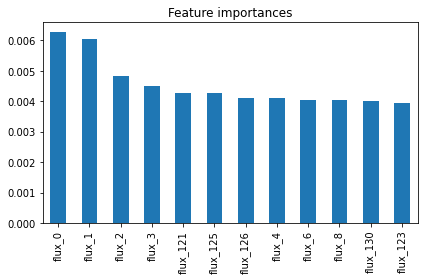

In [99]:
importances = RF.feature_importances_

forest_importances = pd.Series(importances, index=feats)
RF_10feats = forest_importances.nlargest(12)

fig, ax = plt.subplots()
RF_10feats.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [100]:
# singles M7-L7 + noise
# binaries: primary M7-L7, secondary T1-T8

In [101]:
RSEED = 42  

#remove 
feats = list(df_CutNoise1.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')

X0 = np.array(df_CutNoise1[feats]) #data
y0 = np.array(df_CutNoise1['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test

In [102]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.4938 !


In [103]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49      2450
           1       0.49      0.52      0.51      2385

    accuracy                           0.50      4835
   macro avg       0.50      0.50      0.50      4835
weighted avg       0.50      0.50      0.50      4835



In [104]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.48285714, 0.51714286],
       [0.48176101, 0.51823899]])

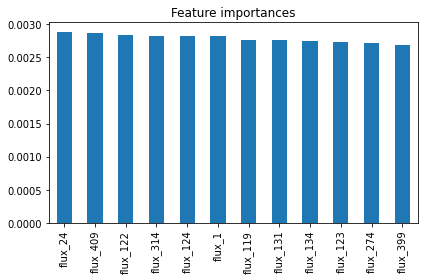

In [105]:
importances = RF.feature_importances_

forest_importances = pd.Series(importances, index=feats)
RF_10feats = forest_importances.nlargest(12)

fig, ax = plt.subplots()
RF_10feats.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [106]:
# singles all
# binaries: primary M7-L7, secondary T1-T8

In [107]:
RSEED = 42  

#remove 
feats = list(df_all1.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')

X0 = np.array(df_all1[feats]) #data
y0 = np.array(df_all1['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [108]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.5079 !


In [109]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       962
           1       0.51      0.49      0.50       995

    accuracy                           0.50      1957
   macro avg       0.50      0.50      0.50      1957
weighted avg       0.50      0.50      0.50      1957



In [110]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.51143451, 0.48856549],
       [0.51256281, 0.48743719]])

In [111]:
# singles all
# binaries all

In [112]:
RSEED = 42  

#remove 
feats = list(df_all.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')
feats.remove('primary_type')
feats.remove('secondary_type')

X0 = np.array(df_all[feats]) #data
y0 = np.array(df_all['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [113]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.5075 !


In [114]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      5256
           1       0.51      0.49      0.50      5355

    accuracy                           0.50     10611
   macro avg       0.50      0.50      0.50     10611
weighted avg       0.50      0.50      0.50     10611



In [115]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.51655251, 0.48344749],
       [0.51111111, 0.48888889]])

In [116]:
# singles all
# binaries 0.01*all sample

In [117]:
RSEED = 42  

#remove 
feats = list(df_allSam.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')
feats.remove('primary_type')
feats.remove('secondary_type')

X0 = np.array(df_allSam[feats]) #data
y0 = np.array(df_allSam['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [118]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.4783 !


In [119]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.46      0.43      0.45       106
           1       0.48      0.51      0.49       108

    accuracy                           0.47       214
   macro avg       0.47      0.47      0.47       214
weighted avg       0.47      0.47      0.47       214



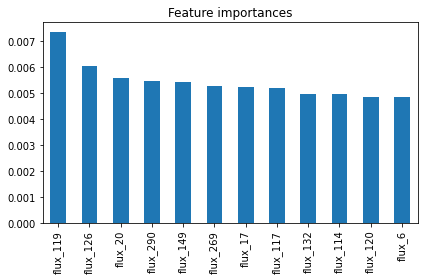

In [120]:
importances = RF.feature_importances_

forest_importances = pd.Series(importances, index=feats)
RF_10feats = forest_importances.nlargest(12)

fig, ax = plt.subplots()
RF_10feats.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()